# Diabetes Prediction

# About the Dataset¶


Pregnancies :- Number of times a woman has been pregnant

Glucose :- Plasma Glucose concentration of 2 hours in an oral glucose tolerance test

BloodPressure :- Diastollic Blood Pressure (mm hg)

SkinThickness :- Triceps skin fold thickness(mm)

Insulin :- 2 hour serum insulin(mu U/ml)

BMI :- Body Mass Index ((weight in kg/height in m)^2)

Age :- Age(years)

DiabetesPedigreeFunction :-scores likelihood of diabetes based on family history)

Outcome :- 0(doesn't have diabetes) or 1 (has diabetes)

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px 


In [185]:
data=pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [186]:
data.shape

(768, 9)

In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [188]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [189]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [190]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [248]:
for i in data:
    print(data[i].min()) 
    print(data[i].max()) 
    print('*'*20)

0
17
********************
44.0
199.0
********************
24.0
122.0
********************
7
99
********************
14.0
846.0
********************
18.2
67.1
********************
0.078
2.42
********************
21
81
********************
0
1
********************


In [191]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [192]:
data=data.drop_duplicates()

In [193]:
data.shape

(768, 9)

In [194]:
#replacing 0 values with median of that column
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())#normal distribution
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())#normal distribution
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].median())#skewed distribution
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].median())#skewed distribution
data['BMI']=data['BMI'].replace(0,data['BMI'].median())#skewed distribution

In [195]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [196]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [197]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.705367,70.810008,26.058000,83.188000,30.880200,0.429734,31.190000
1,4.865672,142.159661,74.950326,29.716418,116.041045,35.381343,0.550500,37.067164


In [198]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [199]:
data_new.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.489773,0.500081,0.500138,0.500278,0.500070,0.500088,0.500059,0.496769,0.348958
std,0.303331,0.289222,0.288977,0.284153,0.272065,0.289229,0.289228,0.294365,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.232725,0.255704,0.233377,0.357888,0.256193,0.248370,0.250978,0.254889,0.000000
50%,0.503259,0.495437,0.516949,0.357888,0.378422,0.487614,0.500000,0.496741,0.000000
75%,0.747718,0.748696,0.760104,0.735332,0.750000,0.752934,0.750000,0.762060,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [200]:
def plot(fig):
    plt.figure(figsize=(10,5))
    plt.subplot(1,3,1)
    sns.boxplot(y=data[fig],x=data.Outcome)
    plt.subplot(1,3,2)
    sns.histplot(x=data[fig],kde=True)
    plt.subplot(1,3,3)
    sns.scatterplot(x=data[fig],y=data.Insulin)    

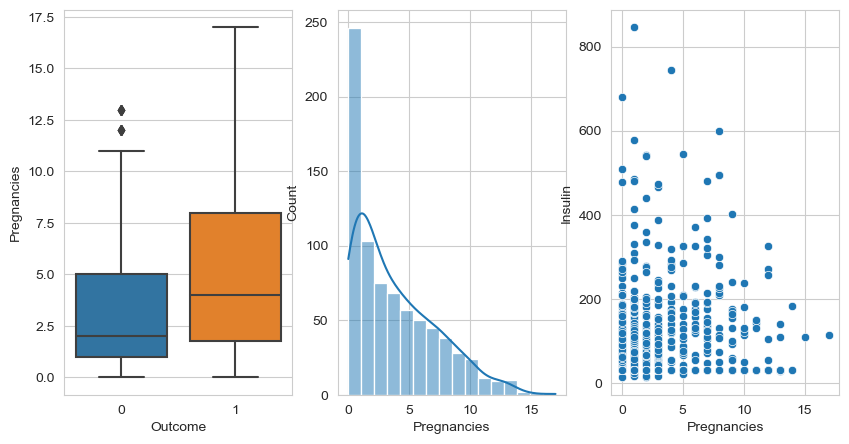

In [201]:
plot('Pregnancies')

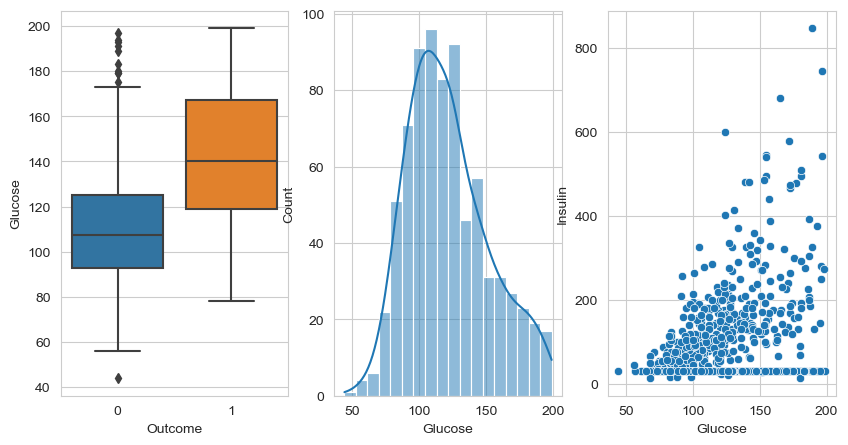

In [202]:
plot('Glucose')

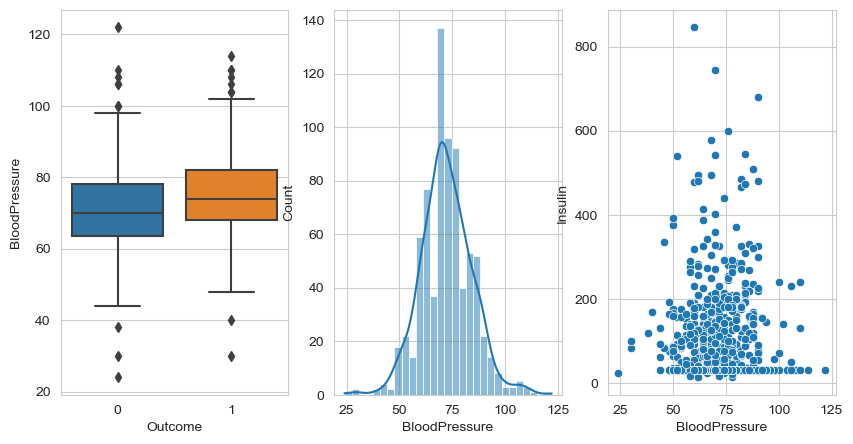

In [203]:
plot('BloodPressure')

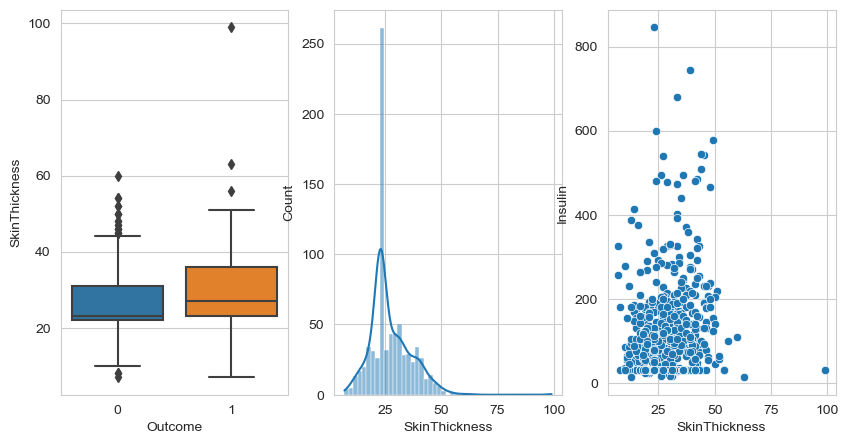

In [204]:
plot('SkinThickness')

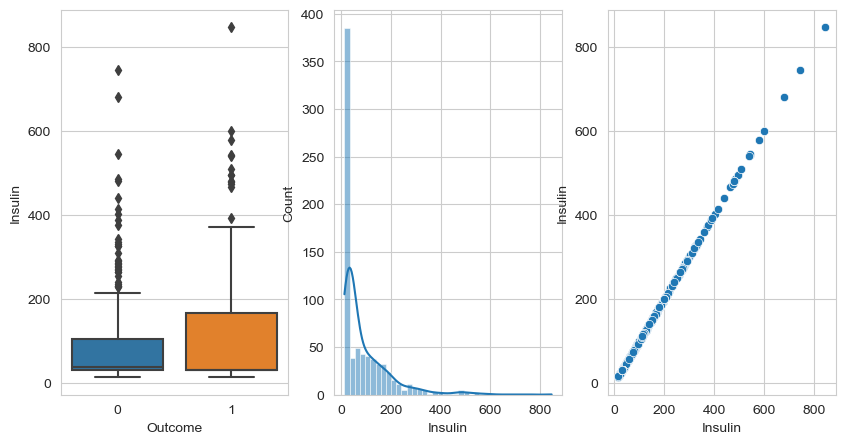

In [205]:
plot('Insulin')

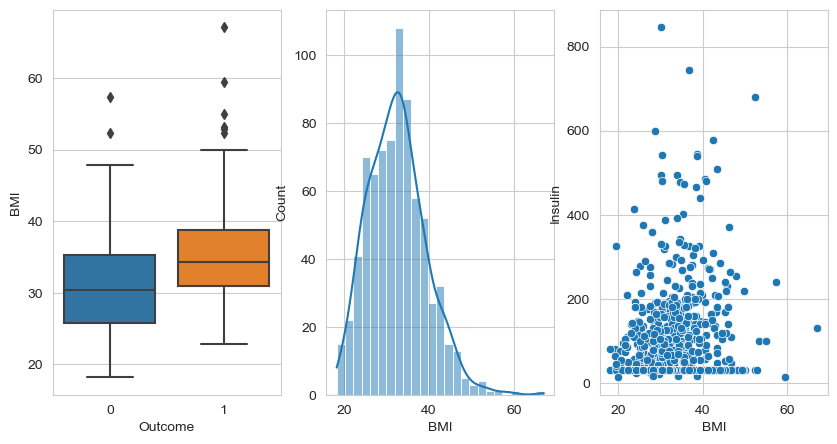

In [206]:
plot('BMI')

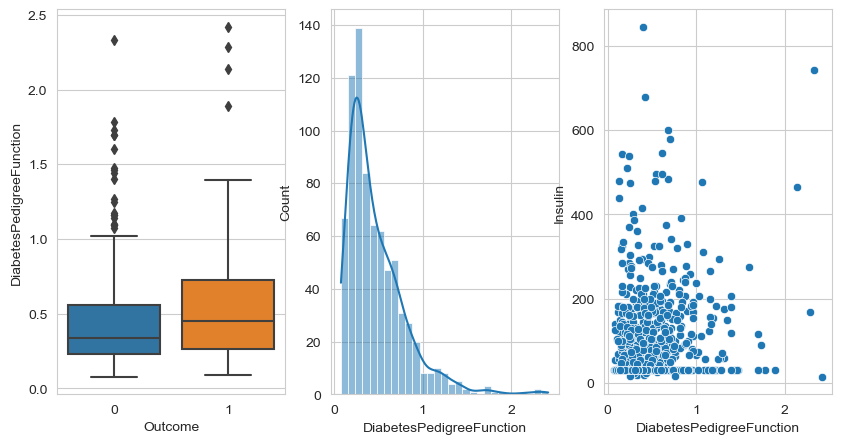

In [207]:
plot('DiabetesPedigreeFunction')

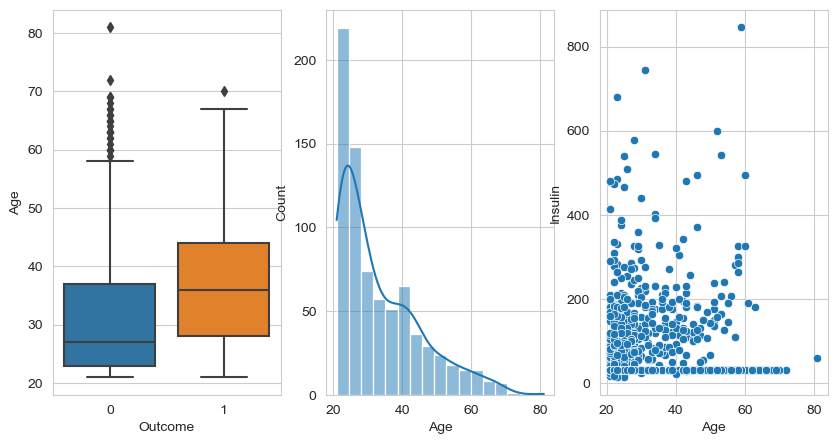

In [208]:
plot('Age')

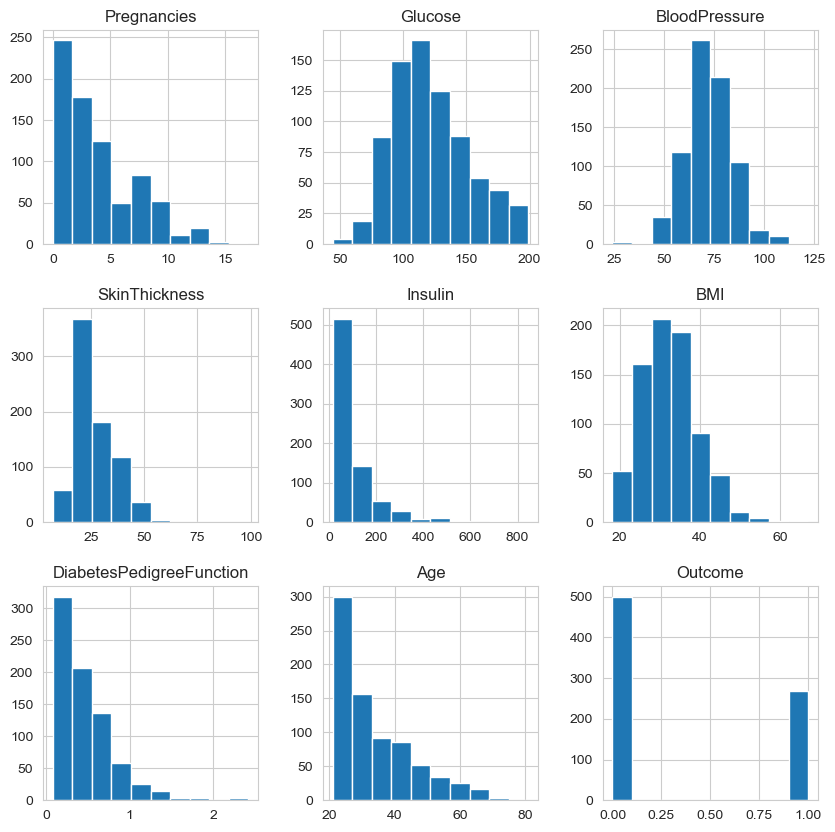

In [209]:
#histogram for each  feature
data.hist(bins=10,figsize=(10,10))
plt.show()

<AxesSubplot:>

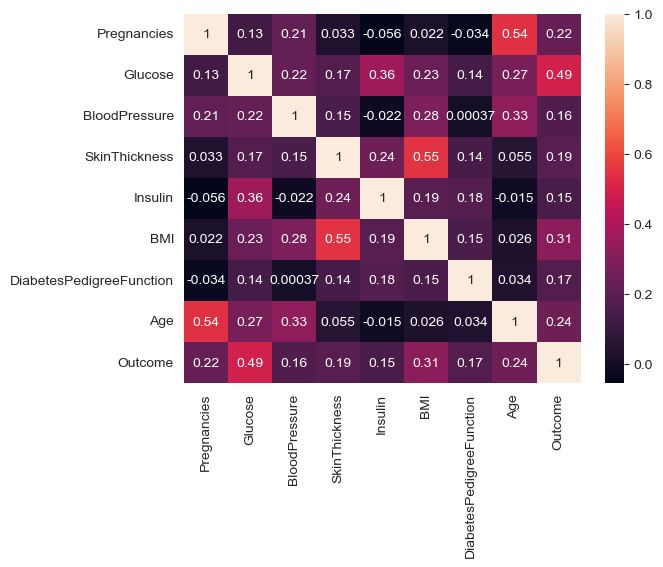

In [210]:
corrmat=data.corr()
sns.heatmap(corrmat, annot=True)

In [211]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Handle outlire

In [212]:
from sklearn.preprocessing import QuantileTransformer
x=data
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
data_new=quantile.transform(X)
data_new=pd.DataFrame(X)
data_new.columns =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data_new.head()


H:\install anaconda\lib\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  warnings.warn(
H:\install anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.747718,0.810300,0.516949,0.801825,0.256193,0.591265,0.750978,0.889831,1.0
1,0.232725,0.091265,0.290091,0.644720,0.256193,0.213168,0.475880,0.558670,0.0
2,0.863755,0.956975,0.233377,0.357888,0.256193,0.077575,0.782269,0.585398,1.0
3,0.232725,0.124511,0.290091,0.357888,0.662973,0.284224,0.106258,0.000000,0.0
4,0.000000,0.721643,0.005215,0.801825,0.834420,0.926988,0.997392,0.606258,1.0


In [213]:
data_new.shape

(768, 9)

<AxesSubplot:xlabel='SkinThickness'>

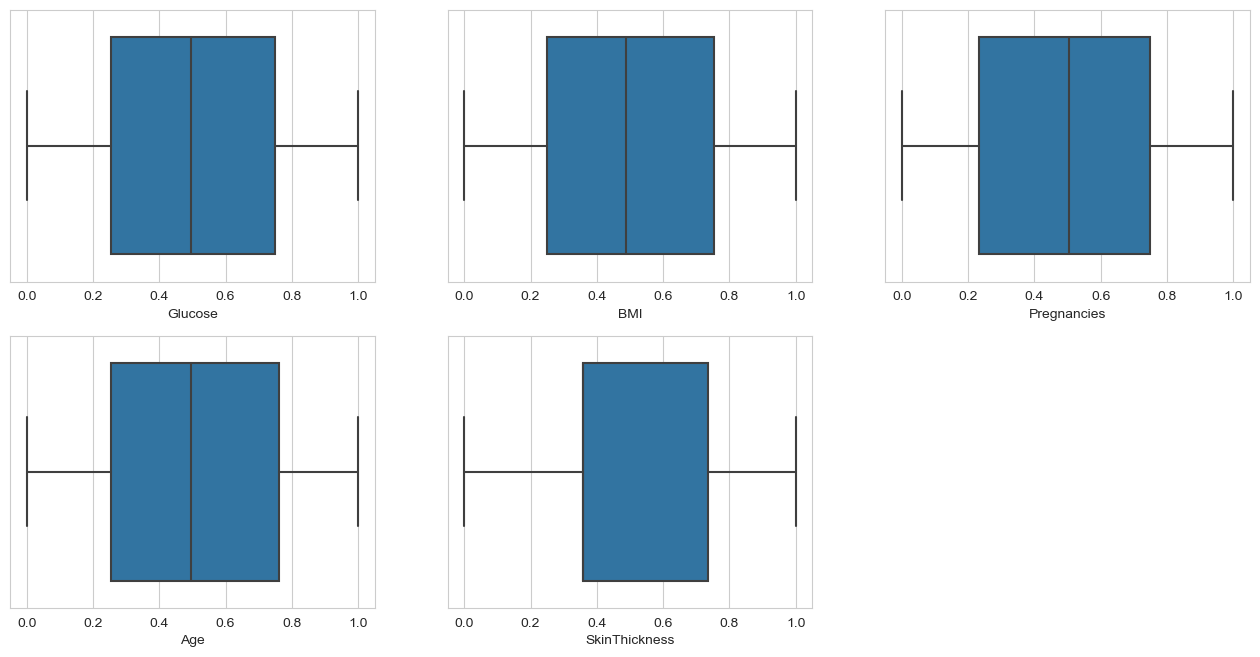

In [214]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x=data_new['Glucose'],data=data_new)
plt.subplot(3,3,2)
sns.boxplot(x=data_new['BMI'],data=data_new)
plt.subplot(3,3,3)
sns.boxplot(x=data_new['Pregnancies'],data=data_new)
plt.subplot(3,3,4)
sns.boxplot(x=data_new['Age'],data=data_new)
plt.subplot(3,3,5)
sns.boxplot(x=data_new['SkinThickness'],data=data_new)

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

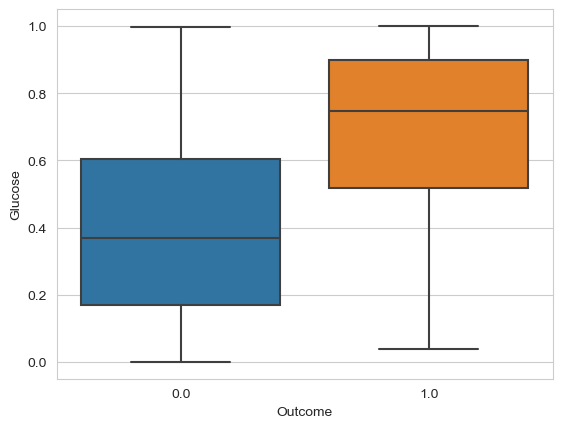

In [215]:
 sns.boxplot(y=data_new['Glucose'],x=data_new.Outcome)

In [219]:
# Data Splitting

x = data.drop(['Outcome'], axis=1)

y = data.Outcome


In [220]:
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0             35     30.5  33.6   
1              1     85.0           66.0             29     30.5  26.6   
2              8    183.0           64.0             23     30.5  23.3   
3              1     89.0           66.0             23     94.0  28.1   
4              0    137.0           40.0             35    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0             48    180.0  32.9   
764            2    122.0           70.0             27     30.5  36.8   
765            5    121.0           72.0             23    112.0  26.2   
766            1    126.0           60.0             23     30.5  30.1   
767            1     93.0           70.0             31     30.5  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [221]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [222]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [223]:
scaler.fit(x)

StandardScaler()

In [224]:
standarize_data=scaler.transform(x)

In [225]:
print(standarize_data)

[[ 0.63994726  0.86527574 -0.0210444  ...  0.16724016  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20598931 -0.51658286 ... -0.85155088 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01597855 -0.68176235 ... -1.33183808  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02240928 -0.0210444  ... -0.90976751 -0.68519336
  -0.27575966]
 [-0.84488505  0.14197684 -1.01212132 ... -0.34215536 -0.37110101
   1.17073215]
 [-0.84488505 -0.94297153 -0.18622389 ... -0.29849289 -0.47378505
  -0.87137393]]


In [227]:
x=standarize_data
y=data_new.Outcome

In [228]:
print(x)
print(y)

[[ 0.63994726  0.86527574 -0.0210444  ...  0.16724016  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20598931 -0.51658286 ... -0.85155088 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01597855 -0.68176235 ... -1.33183808  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02240928 -0.0210444  ... -0.90976751 -0.68519336
  -0.27575966]
 [-0.84488505  0.14197684 -1.01212132 ... -0.34215536 -0.37110101
   1.17073215]
 [-0.84488505 -0.94297153 -0.18622389 ... -0.29849289 -0.47378505
  -0.87137393]]
0      1.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
763    0.0
764    0.0
765    0.0
766    1.0
767    0.0
Name: Outcome, Length: 768, dtype: float64


In [234]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
 

In [235]:
X_train.shape , y_train.shape

((514, 8), (514,))

In [236]:
X_test.shape , y_test.shape

((254, 8), (254,))

# Classification Algorithms

- KNN
- Naive Bayes
- SVM
- Decision Tree
- Random Forest
- Logistic Regression

In [237]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV


#List Hyperparameters to tune
knn= KNeighborsClassifier()
n_neighbors = list(range(15,25))
p=[1,2]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

#convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p,weights=weights,metric=metric)

#Making model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knn, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring='f1',error_score=0)


best_model = grid_search.fit(X_train,y_train)



Best leaf_size: 30
Best p: 1
Best n_neighbors: 15
****************************************************************************************************


H:\install anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Classification Report is:
               precision    recall  f1-score   support

         0.0       0.78      0.87      0.82       168
         1.0       0.67      0.51      0.58        86

    accuracy                           0.75       254
   macro avg       0.72      0.69      0.70       254
weighted avg       0.74      0.75      0.74       254

****************************************************************************************************

 F1:
 0.5789473684210527

 Precision score is:
 0.6666666666666666

 Recall score is:
 0.5116279069767442

 Confusion Matrix:



<AxesSubplot:>

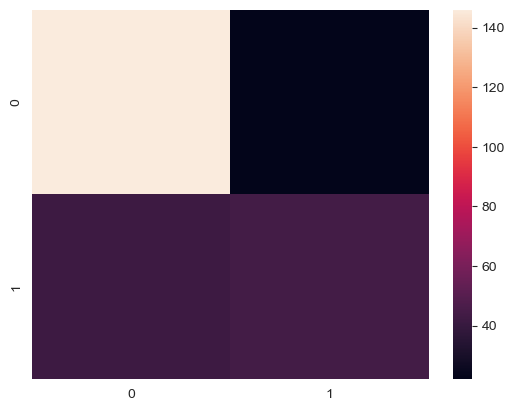

In [238]:
#Best Hyperparameters Value
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

print('*'*100)

#Predict testing set
knn_pred = best_model.predict(X_test)


print("Classification Report is:\n",classification_report(y_test,knn_pred))
print('*'*100)
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,knn_pred))

# Naive Bayes 

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Classification Report is:
               precision    recall  f1-score   support

         0.0       0.76      0.89      0.82       168
         1.0       0.67      0.45      0.54        86

    accuracy                           0.74       254
   macro avg       0.72      0.67      0.68       254
weighted avg       0.73      0.74      0.72       254

****************************************************************************************************

 F1:
 0.5416666666666666

 Precision score is:
 0.6724137931034483

 Recall score is:
 0.45348837209302323

 Confusion Matrix:



<AxesSubplot:>

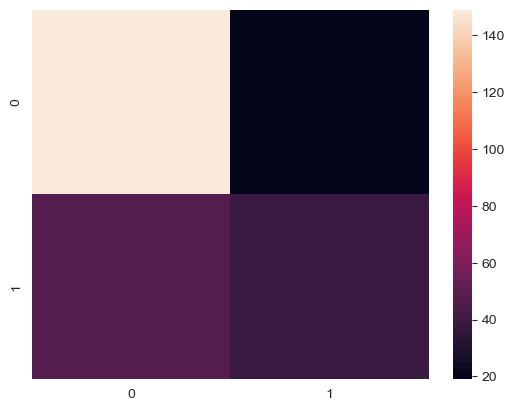

In [239]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

param_grid_nb = {
    'var_smoothing': np.logspace(0,-2, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)


best_model= nbModel_grid.fit(X_train, y_train)

nb_pred=best_model.predict(X_test)


print("Classification Report is:\n",classification_report(y_test,nb_pred))
print('*'*100)
print("\n F1:\n",f1_score(y_test,nb_pred))
print("\n Precision score is:\n",precision_score(y_test,nb_pred))
print("\n Recall score is:\n",recall_score(y_test,nb_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,nb_pred))

# Support Vector Machine 

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.78      0.85      0.81       168
         1.0       0.64      0.55      0.59        86

    accuracy                           0.74       254
   macro avg       0.71      0.70      0.70       254
weighted avg       0.74      0.74      0.74       254

****************************************************************************************************

 F1:
 0.5789473684210527

 Precision score is:
 0.6666666666666666

 Recall score is:
 0.5116279069767442

 Confusion Matrix:



<AxesSubplot:>

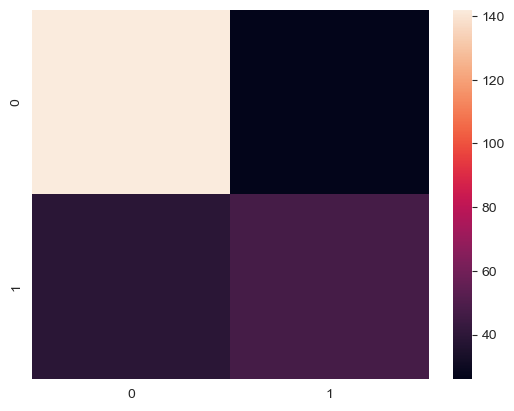

In [240]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score


model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']


# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)


grid_result = grid_search.fit(X_train, y_train)

svm_pred=grid_result.predict(X_test)

print("Classification Report is:\n",classification_report(y_test,svm_pred))
print('*'*100)
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,svm_pred))

# DecisionTree

Fitting 4 folds for each of 40 candidates, totalling 160 fits
Classification Report is:
               precision    recall  f1-score   support

         0.0       0.79      0.88      0.83       168
         1.0       0.70      0.53      0.61        86

    accuracy                           0.76       254
   macro avg       0.74      0.71      0.72       254
weighted avg       0.76      0.76      0.75       254

****************************************************************************************************

 F1:
 0.6052631578947368

 Precision score is:
 0.696969696969697

 Recall score is:
 0.5348837209302325

 Confusion Matrix:



<AxesSubplot:>

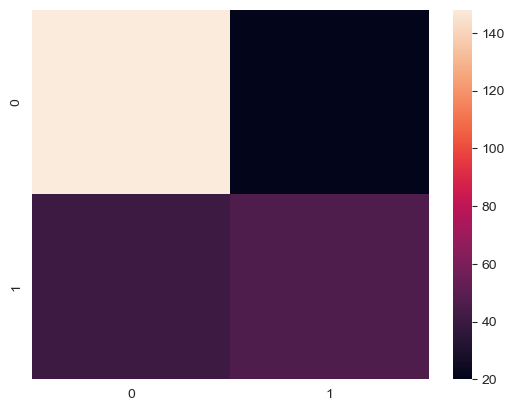

In [241]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)

# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [5, 10, 20,25],
    'min_samples_leaf': [10, 20, 50, 100,120],
    'criterion': ["gini", "entropy"]
}


grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")


best_model=grid_search.fit(X_train, y_train)

dt_pred=best_model.predict(X_test)

print("Classification Report is:\n",classification_report(y_test,dt_pred))
print('*'*100)
print("\n F1:\n",f1_score(y_test,dt_pred))
print("\n Precision score is:\n",precision_score(y_test,dt_pred))
print("\n Recall score is:\n",recall_score(y_test,dt_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,dt_pred))

# Random Forest

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.82      0.82      0.82       168
         1.0       0.64      0.64      0.64        86

    accuracy                           0.76       254
   macro avg       0.73      0.73      0.73       254
weighted avg       0.76      0.76      0.76       254


 F1:
 0.5789473684210527

 Precision score is:
 0.6666666666666666

 Recall score is:
 0.5116279069767442

 Confusion Matrix:



<AxesSubplot:>

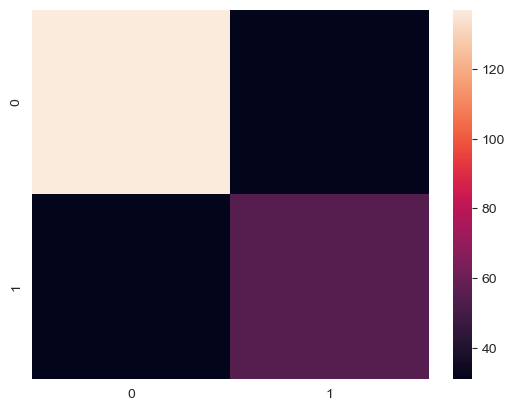

In [242]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV


# define models and parameters
model = RandomForestClassifier()
n_estimators = [1800]
max_features = ['sqrt', 'log2']


# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)


best_model = grid_search.fit(X_train, y_train)

rf_pred=best_model.predict(X_test)


print("Classification Report is:\n",classification_report(y_test,rf_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,rf_pred))


# Logistic Regression

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.80      0.83      0.82       168
         1.0       0.65      0.59      0.62        86

    accuracy                           0.75       254
   macro avg       0.72      0.71      0.72       254
weighted avg       0.75      0.75      0.75       254


 F1:
 0.6181818181818183

 Precision score is:
 0.6455696202531646

 Recall score is:
 0.5930232558139535

 Confusion Matrix:



<AxesSubplot:>

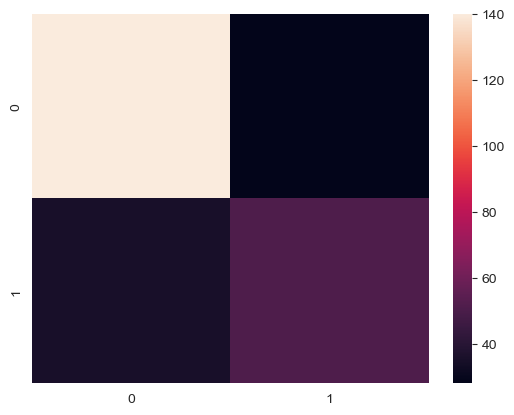

In [243]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score


reg = LogisticRegression()
reg.fit(X_train,y_train)  


lr_pred=reg.predict(X_test)

print("Classification Report is:\n",classification_report(y_test,lr_pred))
print("\n F1:\n",f1_score(y_test,lr_pred))
print("\n Precision score is:\n",precision_score(y_test,lr_pred))
print("\n Recall score is:\n",recall_score(y_test,lr_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,lr_pred))

In [253]:

input_data=(5,166,72,19,175,25.8,0.587 ,51)
data_as=np.asarray(input_data)
data_reshape=data_as.reshape(1,-1)

# std_data=scaler.transform(data_reshape)
# print(std_data)

prediction=reg.predict(data_reshape)

if (prediction[0]==0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')


The person is diabetic


In [254]:
import pickle
filename='trained_model.sav'
pickle.dump(reg ,open(filename ,'wb'))

In [255]:
# loading the saved model 
model=pickle.load(open('trained_model.sav', 'rb'))

In [256]:

input_data=(5,166,72,19,175,25.8,0.587 ,51)
data_as=np.asarray(input_data)
data_reshape=data_as.reshape(1,-1)

# std_data=scaler.transform(data_reshape)
# print(std_data)

prediction=model.predict(data_reshape)

if (prediction[0]==0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')


The person is diabetic
